In [ ]:
pip install redis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 7.2 MB/s eta 0:00:00


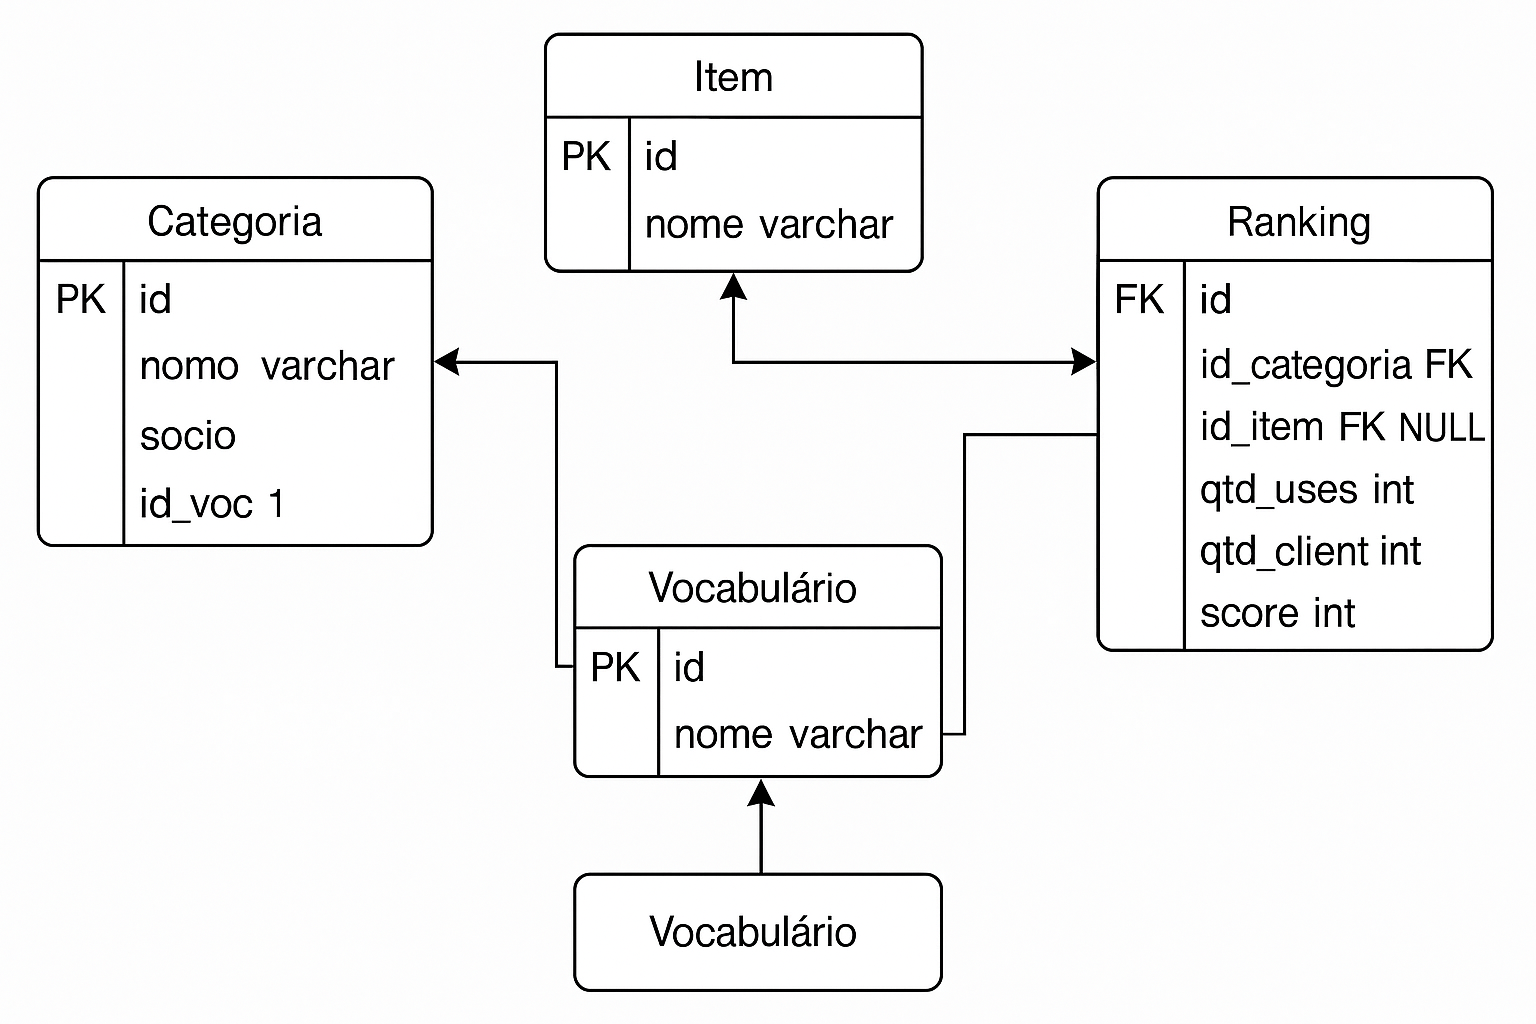

In [ ]:
import redis
import json
import ssl
import pandas as pd

# Criando um contexto SSL
ssl_context = ssl.create_default_context()
ssl_context.set_ciphers('DEFAULT@SECLEVEL=1')  # Forçar a compatibilidade de ciphers

# Conectando ao Redis remoto
r = redis.Redis(
    host='redis-12984.c283.us-east-1-4.ec2.redns.redis-cloud.com',
    port=12984,
    db=0,
    password='EJ37N5sHkEaChBiC9T08wLMTzEwmO3L1',

)

In [ ]:
# Estrutura do campeonato de ping pong
voc = {
    "id": 1,
    "nome": "Modalidade",
    "termos": ["Simples", "Duplas", "Equipes"]
}
r.set("voc:1", json.dumps(voc))

# Categoria
categoria = {
    "id": 1,
    "nome": "Sub-18 Masculino",
    "codigo": 101,
    "socio": "Federação de Ping Pong",
    "id_voc": 1
}
r.set("categoria:1", json.dumps(categoria))

# Itens (Atletas)
atleta = {
    "id": 1,
    "nome": "Ana Silva",
    "id_voc": 2  # Participante
}
r.set("item:1", json.dumps(atleta))

# Ranking
ranking = {
    "id": 1,
    "id_categoria": 1,
    "id_item": 1,
    "qtd_uses": 15,
    "qtd_client": 12,
    "score": 1200
}
r.set("ranking:1", json.dumps(ranking))

# Verificando os dados inseridos
voc_data = r.get("voc:1")
categoria_data = r.get("categoria:1")
atleta_data = r.get("item:1")
ranking_data = r.get("ranking:1")

# Exibindo os dados
print(voc_data)
print(categoria_data)
print(atleta_data)
print(ranking_data)

b'{"id": 1, "nome": "Modalidade", "termos": ["Simples", "Duplas", "Equipes"]}'
b'{"id": 1, "nome": "Sub-18 Masculino", "codigo": 101, "socio": "Federa\\u00e7\\u00e3o de Ping Pong", "id_voc": 1}'
b'{"id": 1, "nome": "Ana Silva", "id_voc": 2}'
b'{"id": 1, "id_categoria": 1, "id_item": 1, "qtd_uses": 15, "qtd_client": 12, "score": 1200}'


In [ ]:
# Função genérica para buscar todas as chaves de um tipo e transformar em DataFrame
def redis_to_df(prefix):
    keys = r.keys(f"{prefix}:*")
    data = []
    for key in keys:
        value = r.get(key)
        data.append(json.loads(value))
    df = pd.DataFrame(data)
    return df

# Gerando DataFrames
df_voc = redis_to_df('voc')
df_categoria = redis_to_df('categoria')
df_item = redis_to_df('item')
df_ranking = redis_to_df('ranking')

# Exibindo como tabelas
print("📚 Vocabulário")
display(df_voc)

print("\n🏆 Categoria")
display(df_categoria)

print("\n👤 Itens (Atletas)")
display(df_item)

print("\n📊 Ranking")
display(df_ranking)

📚 Vocabulário


,id,nome,termos
0,1,Modalidade,"[Simples, Duplas, Equipes]"



🏆 Categoria


,id,nome,codigo,socio,id_voc
0,1,Sub-18 Masculino,101,Federação de Ping Pong,1



👤 Itens (Atletas)


,id,nome,id_voc
0,1,Ana Silva,2



📊 Ranking


,id,id_categoria,id_item,qtd_uses,qtd_client,score
0,1,1,1,15,12,1200


In [ ]:
df_categoria

,id,nome,codigo,socio,id_voc
0,1,Sub-18 Masculino,101,Federação de Ping Pong,1


📝 Resumo do Fluxo

Etapa	Descrição
Buscar chaves (prefixo)	Filtra chaves no Redis com r.keys()

Inicializar lista	Cria uma lista para armazenar os registros

Iterar e converter JSON	Lê cada valor, converte de JSON bytes para dicionário Python

Construir DataFrame	Monta o DataFrame pandas com os dicionários

Retornar o resultado

Entrega o DataFrame final

In [1]:
pip install pandas sqlalchemy psycopg2 redis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 6.4 MB/s eta 0:00:00


In [2]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

# Dados de conexão
host = 'dpg-d16kmugdl3ps739giv5g-a.oregon-postgres.render.com'
dbname = 'pingpong_grjk'
user = 'pingpong_grjk_user'
password = 'zwwUd1vJIY9W7pQZ9hasoxbDuZzB4h5I'
port = '5432'

# Criando a URL de conexão com SQLAlchemy
connection_url = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

# Criando o engine de conexão
engine = create_engine(connection_url)

# Consultar dados
query = "SELECT * FROM categoria;"  # Substitua "sua_tabela" pelo nome da sua tabela
df = pd.read_sql(query, engine)

# Exibir os primeiros dados
print(df.head())

OperationalError: (psycopg2.OperationalError) connection to server at "dpg-d0if6jodl3ps73cjqnng-a.oregon-postgres.render.com" (35.227.164.209), port 5432 failed: SSL connection has been closed unexpectedly

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [8]:
import pandas as pd
from sqlalchemy import create_engine

# Dados de conexão
host = 'dpg-d16kmugdl3ps739giv5g-a.oregon-postgres.render.com'
dbname = 'tenis_de_mesa_v_2'
user = 'tenis_de_mesa_v_2_user'
password = '4Xopur2nE4axZiWnx2YDmfIgnTDOYrBy'
port = '5432'

# Criando a URL de conexão com SQLAlchemy
connection_url = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

# Criando o engine de conexão
engine = create_engine(connection_url)

# Consultando todas as tabelas do esquema público
query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
"""

# Executando a consulta e exibindo o resultado
tabelas = pd.read_sql(query, engine)
print("Tabelas disponíveis:")
print(tabelas)

OperationalError: (psycopg2.OperationalError) connection to server at "dpg-d16kmugdl3ps739giv5g-a.oregon-postgres.render.com" (35.227.164.209), port 5432 failed: SSL connection has been closed unexpectedly

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [4]:
# Nome da tabela que você quer inspecionar
tabela = 'atleta'

# Consulta para obter colunas da tabela
query_colunas = f"""
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = '{tabela}';
"""

# Executa a consulta
colunas = pd.read_sql(query_colunas, engine)
print(f"Colunas da tabela '{tabela}':")
print(colunas)


Colunas da tabela 'atleta':
  column_name          data_type
0     id_time           smallint
1          id           smallint
2     id_país           smallint
3        sexo  character varying
4       senha  character varying
5        nome  character varying
6   sobrenome  character varying


In [5]:
import pandas as pd

# Lista com os nomes das tabelas
tabelas = ['atleta', 'time', 'país', 'torneio', 'partida', 'atleta_partida']

# Dicionário para armazenar os DataFrames
dataframes = {}

# Loop para carregar cada tabela
for tabela in tabelas:
    query = f"SELECT * FROM {tabela};"
    try:
        df = pd.read_sql(query, engine)
        dataframes[tabela] = df
        print(f"Tabela '{tabela}' carregada com {len(df)} registros.")
    except Exception as e:
        print(f"Erro ao carregar tabela '{tabela}': {e}")

# Exemplo: visualizar a tabela atleta
print("\nVisualização da tabela 'atleta':")
print(dataframes['atleta'].head())


Tabela 'atleta' carregada com 128 registros.
Tabela 'time' carregada com 0 registros.
Tabela 'país' carregada com 208 registros.
Tabela 'torneio' carregada com 1 registros.
Tabela 'partida' carregada com 127 registros.
Tabela 'atleta_partida' carregada com 129 registros.

Visualização da tabela 'atleta':
   id      nome      sobrenome id_time  id_país sexo senha
0   9       LIN        Shidong    None      124    M   123
1  10      Liam      PITCHFORD    None      151    M   123
2  11     Ankur  BHATTACHARJEE    None      104    M   123
3  12       Lam       Siu Hang    None      124    M   123
4  13  Kristian       KALRSSON    None      178    M   123


In [6]:
import pandas as pd

# Exportar todas as tabelas para um arquivo Excel
with pd.ExcelWriter("banco_tenis_de_mesa.xlsx") as writer:
    for nome_tabela, df in dataframes.items():
        df.to_excel(writer, sheet_name=nome_tabela[:31], index=False)  # Excel permite no máximo 31 caracteres no nome da aba

print("Arquivo 'banco_tenis_de_mesa.xlsx' criado com sucesso!")


Arquivo 'banco_tenis_de_mesa.xlsx' criado com sucesso!


In [7]:
# Lendo todas as abas do arquivo Excel
caminho_arquivo = "banco_tenis_de_mesa.xlsx"
tabelas_lidas = pd.read_excel(caminho_arquivo, sheet_name=None)

# Exibindo os nomes das abas/tabelas
print("Tabelas disponíveis no Excel:")
for nome in tabelas_lidas.keys():
    print(f"→ {nome}")

# Exemplo: visualizar as 5 primeiras linhas da aba 'atleta'
print("\nVisualização da tabela 'atleta':")
print(tabelas_lidas['atleta'].head())


Tabelas disponíveis no Excel:
→ atleta
→ time
→ país
→ torneio
→ partida
→ atleta_partida

Visualização da tabela 'atleta':
   id      nome      sobrenome  id_time  id_país sexo  senha
0   9       LIN        Shidong      NaN      124    M    123
1  10      Liam      PITCHFORD      NaN      151    M    123
2  11     Ankur  BHATTACHARJEE      NaN      104    M    123
3  12       Lam       Siu Hang      NaN      124    M    123
4  13  Kristian       KALRSSON      NaN      178    M    123


Exemplos de Manipulação com o DataFrame:

Filtrar os dados (por exemplo, mostrar apenas as linhas com id_voc igual a 1):

In [ ]:
df['socio'] = df['socio'].apply(lambda x: x.replace("Federação de Ping Pong", "Federação Nova"))
print(df)

   id              nome  codigo           socio  id_voc
0   1  Sub-18 Masculino     101  Federação Nova       1
1   2    Nova Categoria     102  Nova Federação       2
2   3   Sub-18 Feminino     103  Federação Nova       3


Alterar valores em uma coluna (por exemplo, atualizar o valor de socio para todos os registros):



In [ ]:
df.to_sql('nome_da_tabela', engine, if_exists='replace', index=False)

inserir os dados modificados ou novos de volta na sua tabela no PostgreSQL, pode usar pandas.

DataFrame.to_sql():

In [ ]:
# Dados a serem adicionados
new_data = {
    'id': [3],  # Novo ID
    'nome': ['Sub-18 Feminino'],
    'codigo': [103],  # Novo código
    'socio': ['Federação de Ping Pong'],
    'id_voc': [3],  # Novo valor para id_voc
}

# Criar o DataFrame com os dados novos
new_df = pd.DataFrame(new_data)

# Exibir para verificar os dados
print(new_df)

   id             nome  codigo                   socio  id_voc
0   3  Sub-18 Feminino     103  Federação de Ping Pong       3


In [ ]:
# Adicionando os dados novos à tabela "categoria"
new_df.to_sql('categoria', engine, if_exists='append', index=False)

1

In [ ]:
query = "SELECT * FROM item;"
df = pd.read_sql(query, engine)
print(df)

   id       nome  id_voc
0   1  Ana Silva       2


In [ ]:
df

,id,nome,codigo,socio,id_voc
0,1,Sub-18 Masculino,101,Federação de Ping Pong,1
1,2,Nova Categoria,102,Nova Federação,2
2,3,Sub-18 Feminino,103,Federação de Ping Pong,3


In [ ]:
import psycopg2
from datetime import datetime

# Conexão com o PostgreSQL Render
def connect_db():
    return psycopg2.connect(
        host='dpg-d16kmugdl3ps739giv5g-a',
        database='tenis_de_mesa_v_2',
        user='tenis_de_mesa_v_2_user',
        password='4Xopur2nE4axZiWnx2YDmfIgnTDOYrBy',
        port='5432'
    )

# Classe Cliente
class Cliente:
    def __init__(self, idCliente, nome, cpf):
        self.idCliente = idCliente
        self.nome = nome
        self.cpf = cpf

    def exibirDados(self):
        print(f"ID: {self.idCliente}, Nome: {self.nome}, CPF: {self.cpf}")

# Classe Contrato
class Contrato:
    def __init__(self, idContrato, numero, valor, dataAssinatura, idCliente):
        self.idContrato = idContrato
        self.numero = numero
        self.valor = valor
        self.dataAssinatura = dataAssinatura
        self.idCliente = idCliente

    def exibirDetalhes(self):
        print(f"ID: {self.idContrato}, Nº: {self.numero}, Valor: {self.valor}, Assinatura: {self.dataAssinatura}, Cliente ID: {self.idCliente}")

# Inicializa tabelas (rodar só uma vez)
def init_db():
    conn = connect_db()
    cur = conn.cursor()
    cur.execute('''
    CREATE TABLE IF NOT EXISTS clientes (
        idCliente SERIAL PRIMARY KEY,
        nome TEXT,
        cpf TEXT
    )
    ''')
    cur.execute('''
    CREATE TABLE IF NOT EXISTS contratos (
        idContrato SERIAL PRIMARY KEY,
        numero TEXT,
        valor REAL,
        dataAssinatura DATE,
        idCliente INTEGER REFERENCES clientes(idCliente)
    )
    ''')
    conn.commit()
    cur.close()
    conn.close()

# Funções auxiliares
def cadastrar_cliente():
    nome = input("Nome do cliente: ")
    cpf = input("CPF do cliente: ")
    conn = connect_db()
    cur = conn.cursor()
    cur.execute("INSERT INTO clientes (nome, cpf) VALUES (%s, %s)", (nome, cpf))
    conn.commit()
    cur.close()
    conn.close()
    print("Cliente cadastrado com sucesso.")

def cadastrar_contrato():
    numero = input("Número do contrato: ")
    valor = float(input("Valor do contrato: "))
    data = input("Data da assinatura (YYYY-MM-DD): ")
    idCliente = int(input("ID do cliente: "))

    conn = connect_db()
    cur = conn.cursor()

    # Verifica se cliente existe
    cur.execute("SELECT idCliente FROM clientes WHERE idCliente = %s", (idCliente,))
    if cur.fetchone() is None:
        print("Erro: Cliente não encontrado. Cadastre o cliente antes de cadastrar o contrato.")
        cur.close()
        conn.close()
        return

    cur.execute("INSERT INTO contratos (numero, valor, dataAssinatura, idCliente) VALUES (%s, %s, %s, %s)",
                (numero, valor, data, idCliente))
    conn.commit()
    cur.close()
    conn.close()
    print("Contrato cadastrado com sucesso.")

def listar_contratos_cliente():
    idCliente = int(input("ID do cliente: "))
    conn = connect_db()
    cur = conn.cursor()
    cur.execute("SELECT * FROM contratos WHERE idCliente=%s", (idCliente,))
    contratos = cur.fetchall()
    for c in contratos:
        contrato = Contrato(*c)
        contrato.exibirDetalhes()
    cur.close()
    conn.close()

def exibir_todos():
    conn = connect_db()
    cur = conn.cursor()
    print("\nClientes:")
    cur.execute("SELECT * FROM clientes")
    for linha in cur.fetchall():
        cliente = Cliente(*linha)
        cliente.exibirDados()

    print("\nContratos:")
    cur.execute("SELECT * FROM contratos")
    for linha in cur.fetchall():
        contrato = Contrato(*linha)
        contrato.exibirDetalhes()
    cur.close()
    conn.close()

def menu():
    init_db()
    while True:
        print("\nMenu:")
        print("1 - Cadastrar cliente")
        print("2 - Cadastrar contrato")
        print("3 - Listar contratos de um cliente")
        print("4 - Exibir todos os dados")
        print("5 - Sair")
        opcao = input("Escolha uma opção: ")

        if opcao == "1":
            cadastrar_cliente()
        elif opcao == "2":
            cadastrar_contrato()
        elif opcao == "3":
            listar_contratos_cliente()
        elif opcao == "4":
            exibir_todos()
        elif opcao == "5":
            break
        else:
            print("Opção inválida.")

if __name__ == "__main__":
    menu()
3


Menu:
1 - Cadastrar cliente
2 - Cadastrar contrato
3 - Listar contratos de um cliente
4 - Exibir todos os dados
5 - Sair
Escolha uma opção: 3
ID do cliente: 1
ID: 2, Nº: 01205, Valor: 1.81, Assinatura: 2025-05-31, Cliente ID: 1
ID: 4, Nº: 010625, Valor: 1.04, Assinatura: 2025-06-01, Cliente ID: 1

Menu:
1 - Cadastrar cliente
2 - Cadastrar contrato
3 - Listar contratos de um cliente
4 - Exibir todos os dados
5 - Sair
Escolha uma opção: 4

Clientes:
ID: 1, Nome: Andson, CPF: 31474822860
ID: 2, Nome: andson, CPF: 3147482260
ID: 3, Nome: Julio Arakaki, CPF: 12345678912

Contratos:
ID: 2, Nº: 01205, Valor: 1.81, Assinatura: 2025-05-31, Cliente ID: 1
ID: 3, Nº: 010625, Valor: 2.25, Assinatura: 2025-06-01, Cliente ID: 3
ID: 4, Nº: 010625, Valor: 1.04, Assinatura: 2025-06-01, Cliente ID: 1

Menu:
1 - Cadastrar cliente
2 - Cadastrar contrato
3 - Listar contratos de um cliente
4 - Exibir todos os dados
5 - Sair
Escolha uma opção: 5


In [ ]:
# Conexão com o PostgreSQL Render
def connect_db():
    return psycopg2.connect(
        host='dpg-d16kmugdl3ps739giv5g-a',
        database='tenis_de_mesa_v_2',
        user='tenis_de_mesa_v_2_user',
        password='4Xopur2nE4axZiWnx2YDmfIgnTDOYrBy',
        port='5432'
    )
